In [1]:
import os
import pandas as pd
import torch
import torchaudio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [2]:
train_csv=pd.read_csv('../input/birdclef-2021/train_metadata.csv')
train_csv.head()

primary_label secondary_labels                                  type  \
0        acafly       ['amegfi']  ['begging call', 'call', 'juvenile']   
1        acafly               []                              ['call']   
2        acafly               []                              ['call']   
3        acafly      ['whwbec1']                              ['call']   
4        acafly      ['whwbec1']                              ['call']   

   latitude  longitude      scientific_name         common_name  \
0   35.3860   -84.1250  Empidonax virescens  Acadian Flycatcher   
1    9.1334   -79.6501  Empidonax virescens  Acadian Flycatcher   
2    5.7813   -75.7452  Empidonax virescens  Acadian Flycatcher   
3    4.6717   -75.6283  Empidonax virescens  Acadian Flycatcher   
4    4.6717   -75.6283  Empidonax virescens  Acadian Flycatcher   

                       author        date      filename  \
0                 Mike Nelson  2012-08-12  XC109605.ogg   
1           Allen T. Chartier  2000-12-26   XC11209.ogg   
2     Sergio Chaparro-Herrera  2012-01-10  XC127032.ogg   
3  Oscar Humberto Marin-Gomez  2009-06-19  XC129974.ogg   
4  Oscar Humberto Marin-Gomez  2009-06-19  XC129981.ogg   

                                             license  rating   time  \
0  Creative Commons Attribution-NonCommercial-Sha...     2.5  09:30   
1  Creative Commons Attribution-NonCommercial-Sha...     3.0      ?   
2  Creative Commons Attribution-NonCommercial-Sha...     3.0  15:20   
3  Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   
4  Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   

                                 url  
0  https://www.xeno-canto.org/109605  
1   https://www.xeno-canto.org/11209  
2  https://www.xeno-canto.org/127032  
3  https://www.xeno-canto.org/129974  
4  https://www.xeno-canto.org/129981

SAMPLE A FEW AUDIOS FROM THE TRAIN SET

In [4]:
base_dir = '../input/birdclef-2021/train_short_audio'
train_csv['full_path'] = base_dir+ '/' + train_csv['primary_label'] + '/' + train_csv['filename']
astfly = train_csv[train_csv['primary_label'] == "astfly"].sample(1, random_state = 33)['full_path'].values[0]
casvir = train_csv[train_csv['primary_label'] == 'casvir'].sample(1, random_state = 33)['full_path'].values[0]
subfly = train_csv[train_csv['primary_label'] == "subfly"].sample(1, random_state = 33)['full_path'].values[0]
wilfly = train_csv[train_csv['primary_label'] == 'wilfly'].sample(1, random_state = 33)['full_path'].values[0]
verdin = train_csv[train_csv['primary_label'] == 'verdin'].sample(1, random_state = 33)['full_path'].values[0]
solsan = train_csv[train_csv['primary_label'] == 'solsan'].sample(1, random_state = 33)['full_path'].values[0]
birds= ["astfly", "casvir", "subfly", "wilfly", "verdin",'solsan']


<h1 style = "font-size:20px;font-family: Comic Sans MS">PLAY A FEW OF OUR SAMPLES:</h1>

In [5]:
ipd.Audio(astfly)

In [6]:
ipd.Audio(casvir)

In [7]:
ipd.Audio(subfly)

In [8]:
ipd.Audio(solsan)

In [10]:
y, sr = librosa.load(subfly)
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', np.shape(y)[0]/sr)

y: [ 2.9824485e-05  2.9567140e-05 -6.8489833e-05 ...  3.2331762e-04
  1.1196162e-04  0.0000000e+00] 

y shape: (2276376,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 103.23700680272108



<h1 style = "font-size:20px;font-family: Comic Sans MS">TRIMMING THE LEADING AND TRAILING SILENCE:🎵</h1>

In [11]:
audio_file, _ = librosa.effects.trim(y)
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [ 2.9824485e-05  2.9567140e-05 -6.8489833e-05 ...  3.2331762e-04
  1.1196162e-04  0.0000000e+00] 

Audio File shape: (2276376,)



<h1 style = "font-size:20px;font-family: Comic Sans MS">APPLY TO ALL OUR SAMPLES:</h1>

In [12]:
y_astfly, sr_astfly = librosa.load(astfly)
audio_astfly, _ = librosa.effects.trim(y_astfly)

y_casvir, sr_casvir = librosa.load(casvir)
audio_casvir, _ = librosa.effects.trim(y_casvir)

y_subfly, sr_subfly = librosa.load(subfly)
audio_subfly, _ = librosa.effects.trim(y_subfly)

y_wilfly, sr_wilfly = librosa.load(wilfly)
audio_wilfly, _ = librosa.effects.trim(y_wilfly)

y_verdin, sr_verdin = librosa.load(verdin)
audio_verdin, _ = librosa.effects.trim(y_verdin)

y_solsan, sr_solsan = librosa.load(solsan)
audio_solsan, _ = librosa.effects.trim(y_solsan)

In [13]:
fig, ax = plt.subplots(6, figsize = (16, 12))
fig.suptitle('Sound Waves', fontsize=16)

librosa.display.waveplot(y = audio_astfly, sr = sr_astfly, color = "#A300F9", ax=ax[0])
librosa.display.waveplot(y = audio_casvir, sr = sr_casvir, color = "#4300FF", ax=ax[1])
librosa.display.waveplot(y = audio_subfly, sr = sr_subfly, color = "#009DFF", ax=ax[2])
librosa.display.waveplot(y = audio_wilfly, sr = sr_wilfly, color = "#00FFB0", ax=ax[3])
librosa.display.waveplot(y = audio_verdin, sr = sr_verdin, color = "#D9FF00", ax=ax[4])
librosa.display.waveplot(y = audio_solsan, sr = sr_solsan, color = "r", ax=ax[5]);

for i, name in zip(range(6), birds):
    ax[i].set_ylabel(name, fontsize=13)

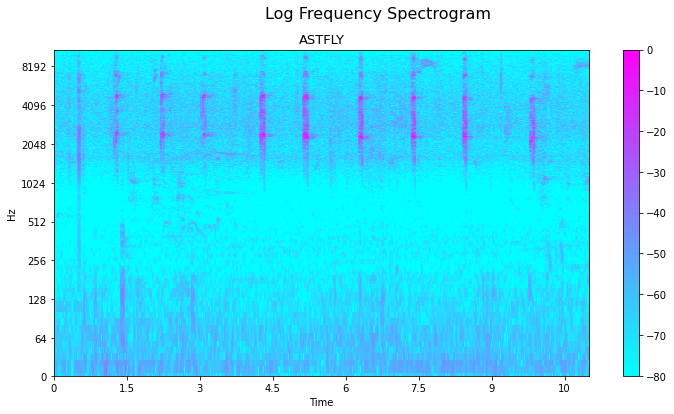

In [14]:
n_fft=2048
hop_length=512
# Short-time Fourier transform (STFT)
D_astfly = np.abs(librosa.stft(audio_astfly, n_fft = n_fft, hop_length = hop_length))
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_astfly = librosa.amplitude_to_db(D_astfly, ref = np.max)
# === PLOT ===
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Log Frequency Spectrogram', fontsize=16)
# fig.delaxes(ax[1, 2])
img=librosa.display.specshow(DB_astfly, sr = sr_astfly, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax)
ax.set_title('ASTFLY', fontsize=13) 
plt.colorbar(img,ax=ax)

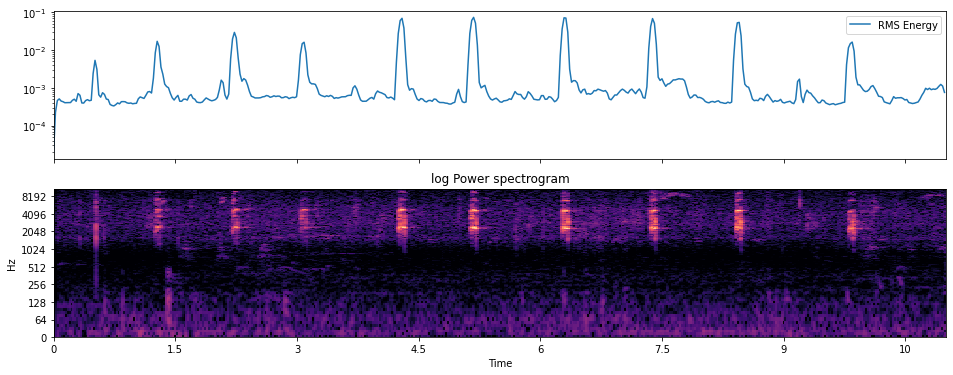

In [15]:
S, phase = librosa.magphase(librosa.stft(audio_astfly))
S_db=librosa.amplitude_to_db(S, ref=np.max)
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True,figsize = (16, 6))
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(S_db,
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
plt.show()

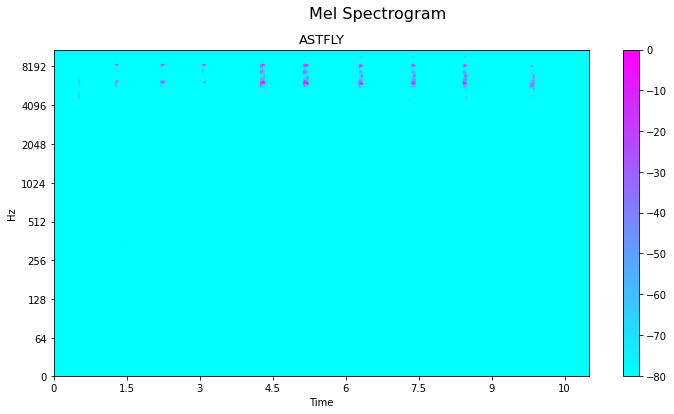

In [16]:
# Create the Mel Spectrograms
S_astfly = librosa.feature.melspectrogram(audio_astfly, sr=sr_astfly)
S_DB_astfly = librosa.amplitude_to_db(S_astfly, ref=np.max)
# === PLOT ====
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Mel Spectrogram', fontsize=16)
img=librosa.display.specshow(S_DB_astfly, sr = sr_astfly, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax)

ax.set_title('ASTFLY', fontsize=13)
plt.colorbar(img,ax=ax)

In [17]:
# Total zero_crossings in our 1 song
zero_astfly = librosa.zero_crossings(audio_astfly, pad=False)
zero_casvir = librosa.zero_crossings(audio_casvir, pad=False)
zero_wilfly = librosa.zero_crossings(audio_wilfly, pad=False)
zero_subfly = librosa.zero_crossings(audio_subfly, pad=False)
zero_verdin = librosa.zero_crossings(audio_verdin, pad=False)
zero_solsan = librosa.zero_crossings(audio_solsan, pad=False)
zero_birds_list = [zero_astfly, zero_casvir, zero_wilfly, zero_subfly, zero_verdin,zero_solsan]

for bird, name in zip(zero_birds_list, birds):
    print("{} change rate is {:,}".format(name, sum(bird)))

astfly change rate is 92,121
casvir change rate is 1,651,380
subfly change rate is 30,477
wilfly change rate is 740,062
verdin change rate is 1,246,690
solsan change rate is 923,452


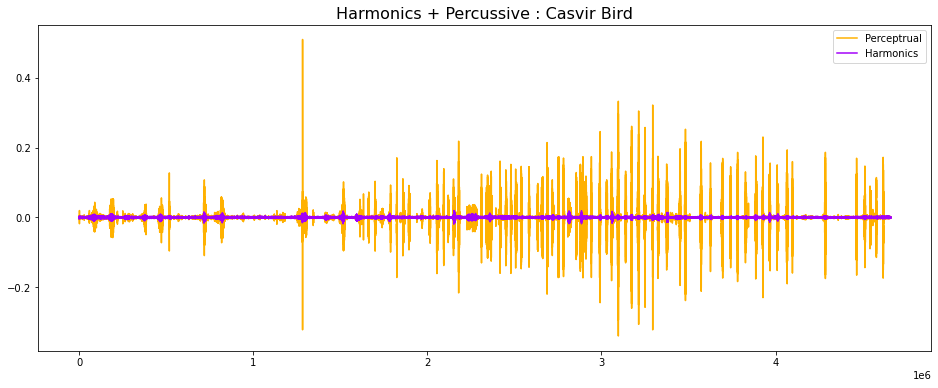

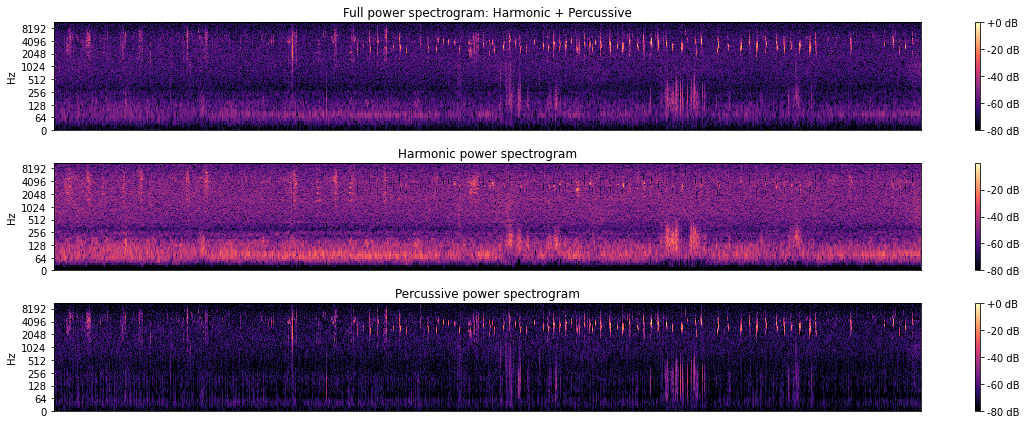

In [18]:
y_harm_casvir, y_perc_casvir = librosa.effects.hpss(audio_casvir)
D_casvir = np.abs(librosa.stft(audio_casvir, n_fft = n_fft, hop_length = hop_length))
DB_casvir = librosa.amplitude_to_db(D_casvir, ref = np.max)
plt.figure(figsize = (16, 6))
plt.plot(y_perc_casvir, color = '#FFB100')
plt.plot(y_harm_casvir, color = '#A300F9')
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics + Percussive : Casvir Bird", fontsize=16);


H, P = librosa.decompose.hpss(librosa.stft(audio_casvir))    
plt.figure(figsize=(16, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(DB_casvir, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Full power spectrogram: Harmonic + Percussive')

# harmonic spectrogram will show more horizontal/pitch-dependent changes
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Harmonic power spectrogram')
plt.subplot(3, 1, 3)

# percussive spectrogram will show more vertical/time-dependent changes
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P), ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Percussive power spectrogram')
plt.tight_layout()
plt.show()

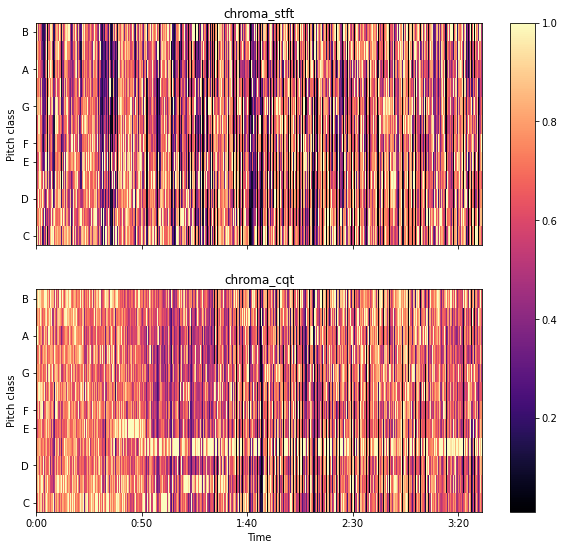

In [23]:
chroma_stft = librosa.feature.chroma_stft(y=audio_casvir, sr=sr_casvir)
chroma_cq = librosa.feature.chroma_cqt(y=audio_casvir, sr=sr_casvir)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,figsize = (10, 9))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
# ax[1].label_outer()
# img = librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[2])
# ax[2].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

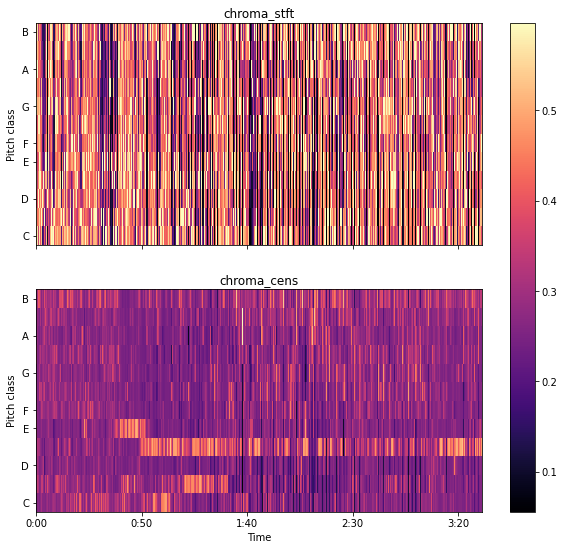

In [24]:
chroma_stft = librosa.feature.chroma_stft(y=audio_casvir, sr=sr_casvir)
chroma_cens = librosa.feature.chroma_cens(y=audio_casvir, sr=sr_casvir)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True,figsize = (10, 9))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()

img = librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

<a id='sec3'></a>
<h1 style = "font-size:50px;font-family: Comic Sans MS;text-align: center">Spectrum Related Features</h1>

Centroids: [4284.12493572 4244.84371012 4131.60038731 ... 4014.83727619 4037.18205728
 4009.1958733 ] 

Shape of Spectral Centroids: (9103,) 

frames: range(0, 9103) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.11301587e+02
 2.11324807e+02 2.11348027e+02]


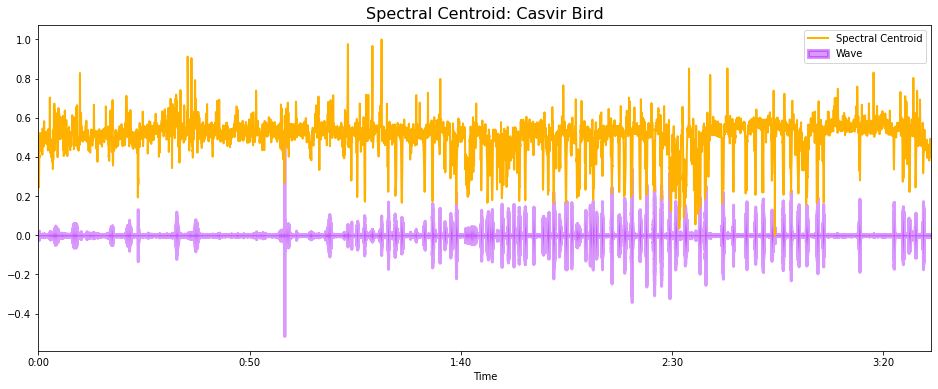

In [25]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_casvir, sr=sr_casvir)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_casvir, sr=sr_casvir, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: Casvir Bird", fontsize=16);

Text(0.5, 1.0, 'Spectral contrast')

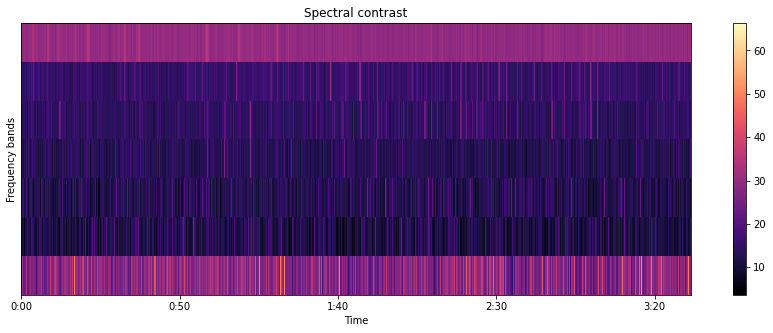

In [26]:
contrast = librosa.feature.spectral_contrast(y=y_harm_casvir,sr=sr_casvir)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

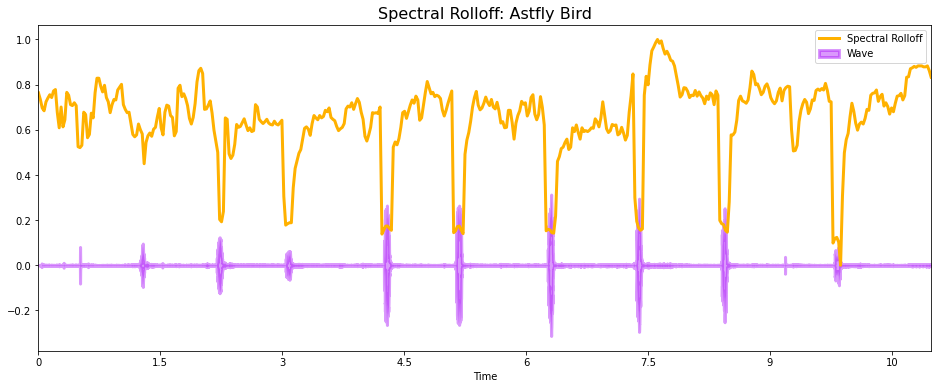

In [27]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_astfly, sr=sr_astfly)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_astfly, sr=sr_astfly, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: Astfly Bird", fontsize=16);

(20, 474)


[Text(0.5, 1.0, 'MFCC')]

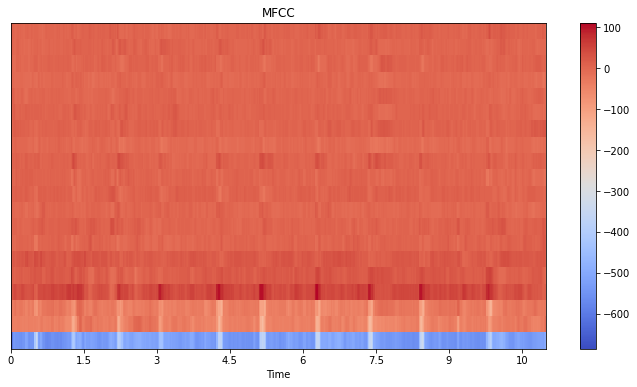

In [28]:
mfcc=librosa.feature.mfcc(y=audio_astfly, sr=sr_astfly)
fig, ax = plt.subplots(1,figsize = (12, 6))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
print(mfcc.shape)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')